# Example 101 - (Transfer Learning for Dogs vs. Cats)

In [29]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
# New
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
# from keras.optimizers import Adam
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

In [13]:
def PlotImages(ix_start, num_img, rows, cols, X, P, label_names):
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    for i in range(num_img):
        plt.subplot(rows, cols, i+1)
        plt.axis('off')
        plt.imshow(X[ix_start+i])
        plt.title(label_names[P[ix_start+i].argmax()])

In [6]:
label_names = ['cat', 'dog']
batch_size = 2000
data_path = '/work/MA490_DeepLearning/Data/Dogs_vs_Cats/Small_Dataset/Train/'
DataGenerator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    data_path,
    target_size = (150, 150),
    batch_size  = batch_size)

Found 2000 images belonging to 2 classes.


In [7]:
(X, P) = DataGenerator.next()
print(X.shape)
print(P.shape)

(2000, 150, 150, 3)
(2000, 2)


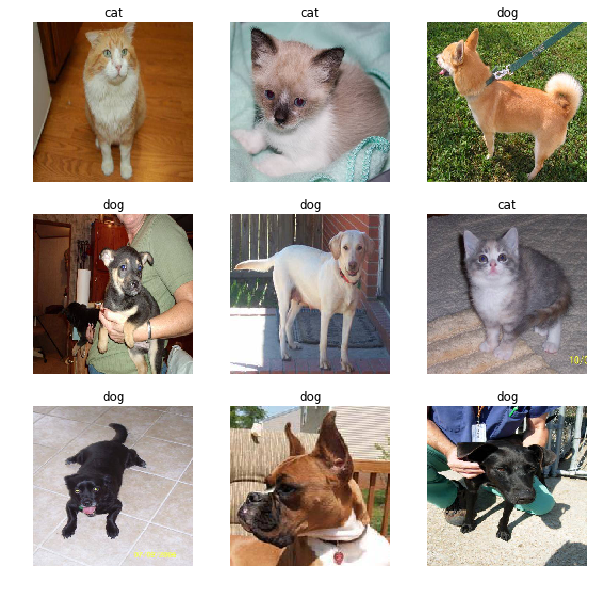

In [14]:
PlotImages(1000, 9, 3, 3, X, P, label_names)

In [15]:
P.sum()

2000.0

In [16]:
P.sum(axis=0)

array([1000., 1000.], dtype=float32)

In [17]:
acc_baseline = (P.sum(axis=0)/P.sum()).max()

In [18]:
print('baseline accuracy rate =', acc_baseline)

baseline accuracy rate = 0.5


LeNet gave test accuracy of 62%.  Validation was 72%.  LeNet is too small.  Need
more layers.

# Build VGG15

In [19]:
# put in own top two layers
# include_top=False says to leave off the last 3 fully connected networks
vgg16_base = VGG16(weights='imagenet', input_shape=(150, 150, 3), include_top=False)
vgg16_base.summary()

58892288/58889256 [==============================] - 8s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool

In [21]:
# extract VGG16 training features
X_features = vgg16_base.predict(X)
print('         X shape: ', X.shape)
print('X_features_shape: ', X_features.shape)

         X shape:  (2000, 150, 150, 3)
X_features_shape:  (2000, 4, 4, 512)


In [24]:
X_features = np.reshape(X_features, (2000, 4*4*512))
print(X_features.shape)

(2000, 8192)


In [30]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=4*4*512))
model.add(Dropout(0.95))
model.add(Dense(2, activation='softmax'))

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [33]:
model.fit(X_features, P, epochs=100, validation_split=0.2, verbose=1)

Train on 1600 samples, validate on 400 samples
Epoch 1/100
1600/1600 [==============================] - 1s 616us/step - loss: 0.5556 - acc: 0.6663 - val_loss: 0.4263 - val_acc: 0.8500
Epoch 2/100
1600/1600 [==============================] - 1s 591us/step - loss: 0.5702 - acc: 0.6619 - val_loss: 0.4119 - val_acc: 0.8575
Epoch 3/100
1600/1600 [==============================] - 1s 616us/step - loss: 0.5325 - acc: 0.6894 - val_loss: 0.3835 - val_acc: 0.8625
Epoch 4/100
1600/1600 [==============================] - 1s 596us/step - loss: 0.5393 - acc: 0.6813 - val_loss: 0.3788 - val_acc: 0.8575
Epoch 5/100
1600/1600 [==============================] - 1s 584us/step - loss: 0.5549 - acc: 0.6825 - val_loss: 0.4119 - val_acc: 0.8650
Epoch 6/100
1600/1600 [==============================] - 1s 595us/step - loss: 0.5379 - acc: 0.6844 - val_loss: 0.4183 - val_acc: 0.8700
Epoch 7/100
1600/1600 [==============================] - 1s 616us/step - loss: 0.5367 - acc: 0.7000 - val_loss: 0.3798 - val_acc: 0

1600/1600 [==============================] - 3s 2ms/step - loss: 0.4342 - acc: 0.7600 - val_loss: 0.2775 - val_acc: 0.8800
Epoch 61/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4412 - acc: 0.7512 - val_loss: 0.2854 - val_acc: 0.8700
Epoch 62/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4320 - acc: 0.7581 - val_loss: 0.2769 - val_acc: 0.8875
Epoch 63/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4581 - acc: 0.7381 - val_loss: 0.2835 - val_acc: 0.8850
Epoch 64/100
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4409 - acc: 0.7550 - val_loss: 0.2909 - val_acc: 0.8875
Epoch 65/100
1600/1600 [==============================] - 2s 1ms/step - loss: 0.4466 - acc: 0.7537 - val_loss: 0.2876 - val_acc: 0.8850
Epoch 66/100
1600/1600 [==============================] - 2s 2ms/step - loss: 0.4457 - acc: 0.7512 - val_loss: 0.2848 - val_acc: 0.8975
Epoch 67/100
1600/1600 [==============================] - 2s 